In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import torch
import numpy as np


## torch.nn 
- `torch.nn` contains many useful utilities for neural netwoks and ML models in general
- many commonly used layers and loss functions are already available

In [31]:
print('Avaliable modules/layers/losses in torch.nn')
print([n for n in dir(torch.nn) if not n.startswith('_')] )

Avaliable modules/layers/losses in torch.nn
['AdaptiveAvgPool1d', 'AdaptiveAvgPool2d', 'AdaptiveAvgPool3d', 'AdaptiveLogSoftmaxWithLoss', 'AdaptiveMaxPool1d', 'AdaptiveMaxPool2d', 'AdaptiveMaxPool3d', 'AlphaDropout', 'AvgPool1d', 'AvgPool2d', 'AvgPool3d', 'BCELoss', 'BCEWithLogitsLoss', 'BatchNorm1d', 'BatchNorm2d', 'BatchNorm3d', 'Bilinear', 'ConstantPad1d', 'ConstantPad2d', 'ConstantPad3d', 'Container', 'Conv1d', 'Conv2d', 'Conv3d', 'ConvTranspose1d', 'ConvTranspose2d', 'ConvTranspose3d', 'CosineEmbeddingLoss', 'CosineSimilarity', 'CrossEntropyLoss', 'CrossMapLRN2d', 'DataParallel', 'Dropout', 'Dropout2d', 'Dropout3d', 'ELU', 'Embedding', 'EmbeddingBag', 'FeatureAlphaDropout', 'Fold', 'FractionalMaxPool2d', 'GLU', 'GRU', 'GRUCell', 'GroupNorm', 'Hardshrink', 'Hardtanh', 'HingeEmbeddingLoss', 'InstanceNorm1d', 'InstanceNorm2d', 'InstanceNorm3d', 'KLDivLoss', 'L1Loss', 'LPPool1d', 'LPPool2d', 'LSTM', 'LSTMCell', 'LayerNorm', 'LeakyReLU', 'Linear', 'LocalResponseNorm', 'LogSigmoid', 'Lo

### nn.Module
- `nn.Module`: the basic unit. One must
  - declare params in the class constructor `__init__`
  - implement `forward` method returning the module's computation

In [32]:
from torch import nn

class MyModule(nn.Module):
    def __init__(self, args, **kwargs):
        # always call __init__ from parent Module
        super().__init__(args, **kwargs)  
        self.param1 
        self.param2
        
    def forward(self, X):
        # do some computation on X, for instance
        result = X.mean(1)
        return result
        

## torch.optim
Implements many commonly used gradient-based optimization algorithms

In [33]:
[n for n in dir(torch.optim) if not n.startswith('_')]

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 'lr_scheduler']

## Example using nn and optim: Simple neural network
Let's work on some synthetic data

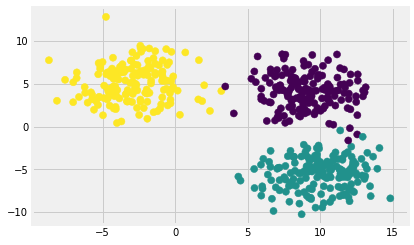

In [34]:
from sklearn.datasets import make_blobs
n_classes = 3
X, y = make_blobs(n_samples=500, n_features=2, centers=n_classes, 
                  cluster_std=2, random_state=24)
plt.scatter(*X.T, c=y, s=50)
X, y = X.astype(np.float32), y.astype(np.int64)


Let's create a module implementing a network with one hidden layer (aka MLP):
$$ y = W_o\sigma (XW_h + b )$$

We are going to use `nn.Linear` to compute linear transformations


In [35]:
  class MLP(nn.Module):
    def __init__(self, in_features, n_hidden, n_classes):
        # always call __init__ from parent Module
        super().__init__()
        
        # declare layers 
        # hidden layer contains Wh and b parameters
        self.hidden = nn.Linear(in_features, n_hidden, bias=True)
        # output layer contains Wo
        self.output = nn.Linear(n_hidden, n_classes, bias=False)
        
    def forward(self, X):
        # calling the layer automatically calls its forward method
        return self.output(torch.sigmoid(self.hidden(X)))

Now we create a network instancing the MLP module 

In [36]:
torch.manual_seed(0)
my_net = MLP(in_features=X.shape[1], n_hidden=6, n_classes=n_classes)
my_net

MLP(
  (hidden): Linear(in_features=2, out_features=6, bias=True)
  (output): Linear(in_features=6, out_features=3, bias=False)
)

We can see the networks parameters using the `parameters` or `named_parameters` methods.

In [37]:
print(list(my_net.named_parameters()))

[('hidden.weight', Parameter containing:
tensor([[-0.0053,  0.3793],
        [-0.5820, -0.5204],
        [-0.2723,  0.1896],
        [-0.0140,  0.5607],
        [-0.0628,  0.1871],
        [-0.2137, -0.1390]], requires_grad=True)), ('hidden.bias', Parameter containing:
tensor([-0.6755, -0.4683, -0.2915,  0.0262,  0.2795,  0.4243], requires_grad=True)), ('output.weight', Parameter containing:
tensor([[-0.2768, -0.1778,  0.1483,  0.3390, -0.0840,  0.3055],
        [-0.0658,  0.0432,  0.3697, -0.3787, -0.2570, -0.1034],
        [-0.1591,  0.3527, -0.2646, -0.1879, -0.2852, -0.3823]],
       requires_grad=True))]


Now we use an optimizer to adjust our network weights

In [38]:
optimizer = torch.optim.SGD(my_net.parameters(), lr=0.1)
loss_fn = nn.CrossEntropyLoss()

n_iterations = 800
loss_curve = []
for _ in range(n_iterations):
    # always zero gradients btw backward calls
    optimizer.zero_grad()

    # to compute a forward pass we simply call module instance 
    # the forward method is automatically called
    y_pred = my_net(torch.from_numpy(X))
    
    #call loss function over predictions and true labels
    loss = loss_fn(y_pred, torch.from_numpy(y))
    loss_curve.append(loss.cpu().data.numpy())
    
    # backpropagate gradients
    loss.backward()
    
    # increase iterator count in optimizer object
    optimizer.step()

### Results

Final accuracy:  99.2


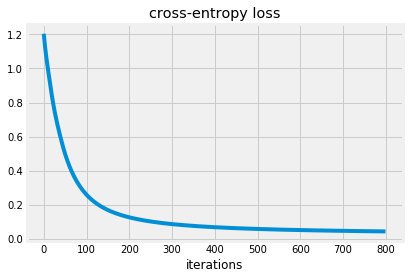

In [39]:
plt.plot(loss_curve)
plt.title('cross-entropy loss'); plt.xlabel('iterations')
y_pred_class = torch.argmax(y_pred, 1).cpu().data.numpy()
print('Final accuracy: ', (y_pred_class == y).mean()*100)

 
# To learn more
Many possibilities at https://pytorch.org/tutorials/
- [Learning PyTorch with Examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)
- [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
- [Data Loading and Processing Tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)
- [Chatbot Tutorial](https://pytorch.org/tutorials/beginner/chatbot_tutorial.html)
- [Reinforcement Learning (DQN) Tutorial](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html)

Also check the [migration guide to 0.4.0](https://pytorch.org/blog/pytorch-0_4_0-migration-guide/)

If you like scikit-learn, checkout [skorch=pytorch+sklearn](https://github.com/dnouri/skorch)